In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pickle

from sklearn.metrics import mean_squared_error

In [18]:
df=pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

In [19]:
# df=df[df.trip_type==2]

In [20]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [21]:
df['duration']=df.dropOff_datetime - df.pickup_datetime

In [22]:
td = df.duration.iloc[0]
td

Timedelta('0 days 00:17:00')

In [23]:
td.total_seconds()/60

17.0

In [24]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [25]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

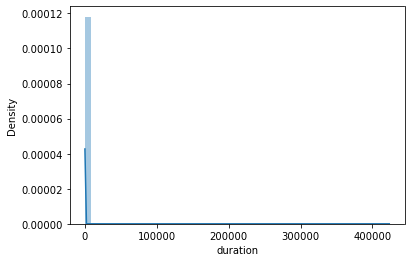

In [13]:
sns.distplot(df.duration)

In [14]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
50%      1.340000e+01
95%      4.725000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

In [30]:
# df[((df.duration > 1)&(df.duration<=60))].shape[0]
df.shape[0] - df[((df.duration > 1)&(df.duration<=60))].shape[0]
#number of "outliers"

44907

In [31]:
df=df[((df.duration > 1)&(df.duration<=60))]

In [38]:
df['PUlocationID']=df['PUlocationID'].fillna(-1)
df['DOlocationID']=df['DOlocationID'].fillna(-1)

/tmp/ipykernel_13280/600205699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOlocationID']=df['DOlocationID'].fillna(-1)


In [42]:
(df['PUlocationID']==-1).mean()

0.8354190613998315

In [43]:
categorical=['PUlocationID','DOlocationID']
# numerical=['trip_distance']

In [44]:
df[categorical]=df[categorical].astype(str)

/tmp/ipykernel_13280/2220226503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical]=df[categorical].astype(str)


In [45]:
df[categorical].dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [46]:
train_dicts=df[categorical].to_dict(orient='records')

In [47]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [50]:
X_train.shape

(1109205, 525)

In [51]:
dv.feature_names_

['DOlocationID=-1.0',
 'DOlocationID=1.0',
 'DOlocationID=10.0',
 'DOlocationID=100.0',
 'DOlocationID=101.0',
 'DOlocationID=102.0',
 'DOlocationID=105.0',
 'DOlocationID=106.0',
 'DOlocationID=107.0',
 'DOlocationID=108.0',
 'DOlocationID=109.0',
 'DOlocationID=11.0',
 'DOlocationID=111.0',
 'DOlocationID=112.0',
 'DOlocationID=113.0',
 'DOlocationID=114.0',
 'DOlocationID=115.0',
 'DOlocationID=116.0',
 'DOlocationID=117.0',
 'DOlocationID=118.0',
 'DOlocationID=119.0',
 'DOlocationID=12.0',
 'DOlocationID=120.0',
 'DOlocationID=121.0',
 'DOlocationID=122.0',
 'DOlocationID=123.0',
 'DOlocationID=124.0',
 'DOlocationID=125.0',
 'DOlocationID=126.0',
 'DOlocationID=127.0',
 'DOlocationID=128.0',
 'DOlocationID=129.0',
 'DOlocationID=13.0',
 'DOlocationID=130.0',
 'DOlocationID=131.0',
 'DOlocationID=132.0',
 'DOlocationID=133.0',
 'DOlocationID=134.0',
 'DOlocationID=135.0',
 'DOlocationID=136.0',
 'DOlocationID=137.0',
 'DOlocationID=138.0',
 'DOlocationID=139.0',
 'DOlocationID=14.

In [52]:
target='duration'
y_train=df[target].values

In [53]:
y_train

array([17.        , 17.        ,  8.28333333, ..., 16.2       ,
       19.43333333, 36.        ])

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred=lr.predict(X_train)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


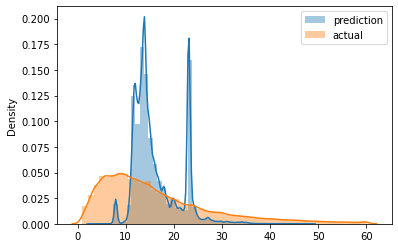

In [57]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [58]:
mean_squared_error(y_train, y_pred, squared=False)

10.523282800794908

In [61]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] =df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PUlocationID','DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [62]:
df_val = read_dataframe('./data/fhv_tripdata_2021-02.parquet')

In [63]:
categorical = ['PUlocationID','DOlocationID']
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [65]:
target = 'duration'
y_val = df_val[target].values

In [66]:
y_pred_val = lr.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared=False)

11.367663253620998